In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from CSoc.Prequisites.idk import box_plot, coerr_heatmap, scale_df, distribution
import numpy as np

path = "C:/Users/VIDIT/Desktop/Codes/CSoc/housing.csv"
df = pd.read_csv(path)
df.drop(df[df['ocean_proximity'] == "ISLAND"].index, inplace=True)
df['ocean_proximity'] = df['ocean_proximity'].map({"<1H OCEAN": -1, "INLAND": 0, "NEAR OCEAN": 1, "NEAR BAY": 2})
df = df.fillna(df.median(numeric_only=True))

#coerr_heatmap(df)

Y = df["median_house_value"]
X = df.drop(['median_house_value'], axis=1, inplace = False)
print(df.isna().sum())

scale_df(X)
distribution(X)
box_plot(X)

Y = Y.to_numpy()
X = X.to_numpy()
np.isnan(X).any()
Y.max()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


np.float64(500001.0)

### Model #1
Written in pure python.

In [2]:
import random
import math

class LinearRegression_my():
    def __init__(self, params = 8):
        self.w = [random.random() for _ in range(params)]
        self.b = random.random()

    def predict(self, x):
        y_hat = []
        for i in x:
            y_hat.append( sum(x_i + w_i for x_i, w_i in zip(i, self.w)) + self.b)
        return y_hat

    def gradients(self, x, y):
        m = len(x)
        y_hat = self.predict(x)
        dj_dw = [0.0] * len(self.w)
        dj_db = 0.0

        for i in range(m):
            error = (y_hat[i] - y[i]) / m
            for j in range(len(self.w)):
                dj_dw[j] += (error * x[i][j])
            dj_db += (error)
        return dj_dw, dj_db

    def Losses(self, x, y):
        m = len(x)
        y_hat = self.predict(x)
        error = [Y_hat - y for Y_hat, y in zip(y_hat, y)]
        mae = sum(abs(er) for er in error) / m
        mse = sum(er**2 for er in error) / m
        rmse = math.sqrt(mse)
        return mae, mse, rmse

    def gradient_descent(self, x, y, alpha = 0.001):
        dj_dw, dj_db = self.gradients(x, y)
        self.w = [W - alpha*dw/10000 for W, dw in zip(self.w, dj_dw)]
        self.b -= alpha * dj_db/10000
        return self.Losses(x, y)



In [3]:
def train(model, X, Y, epoch, lr):
    mse = []
    mae = []
    rmse = []
    for i in range(epoch):
        a, b, c = model.gradient_descent(X, Y, lr)
        mse.append(b)
        mae.append(a)
        rmse.append(c)
        print(f"Epoch:{i+1}\tMSE:{b:.4f}\tMAE:{a:.4f}\tRMSE:{c:.4f}")
        if c > 10000:
             i-=1
    plt.figure(figsize=(12, 8))
    plt.plot(mse, label="Mean Squared Error", color="red")
    plt.plot(mae, label="Mean Absolute Error", color="blue")
    plt.plot(rmse, label="Root Mean Squared Error", color="green")
    plt.show()

Epoch:1	MSE:51564248941.6008	MAE:196833.0986	RMSE:227077.6276
Epoch:2	MSE:51524150513.8383	MAE:196731.2133	RMSE:226989.3181
Epoch:3	MSE:51484093167.9614	MAE:196629.3796	RMSE:226901.0647
Epoch:4	MSE:51444076862.0961	MAE:196527.5976	RMSE:226812.8675
Epoch:5	MSE:51404101554.4139	MAE:196425.8672	RMSE:226724.7264
Epoch:6	MSE:51364167203.1269	MAE:196324.1885	RMSE:226636.6414
Epoch:7	MSE:51324273766.4894	MAE:196222.5612	RMSE:226548.6124
Epoch:8	MSE:51284421202.8006	MAE:196120.9855	RMSE:226460.6394
Epoch:9	MSE:51244609470.3989	MAE:196019.4614	RMSE:226372.7225
Epoch:10	MSE:51204838527.6670	MAE:195917.9887	RMSE:226284.8615
Epoch:11	MSE:51165108333.0295	MAE:195816.5675	RMSE:226197.0564
Epoch:12	MSE:51125418844.9536	MAE:195715.1977	RMSE:226109.3073
Epoch:13	MSE:51085770021.9475	MAE:195613.8793	RMSE:226021.6141
Epoch:14	MSE:51046161822.5632	MAE:195512.6124	RMSE:225933.9767
Epoch:15	MSE:51006594205.3933	MAE:195411.3967	RMSE:225846.3952
Epoch:16	MSE:50967067129.0744	MAE:195310.2324	RMSE:225758.8694
E

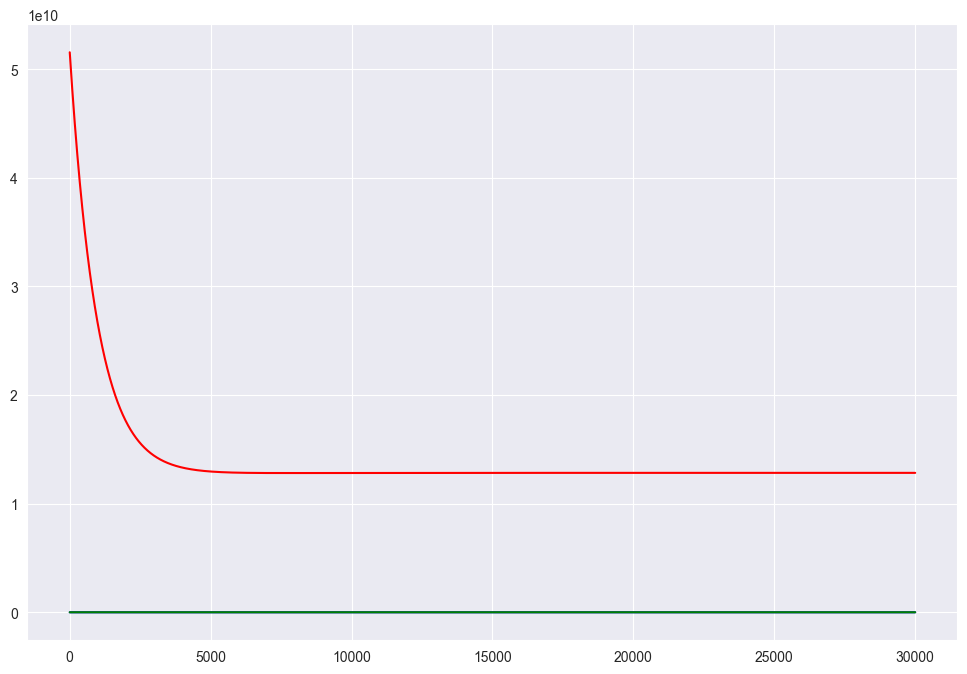

In [7]:
X_train = [X[i] for i in range(int(len(X) * .8))]
X_test = [X[j] for j in range(int(len(X) * .8), len(X))]
Y_train = [Y[i] for i in range(int(len(X) * .8))]
Y_test = [Y[j] for j in range(int(len(X) * .8), len(X))]
Regressor = LinearRegression_my(9)
train(Regressor, X_train, Y_train, 30000, 0.001)

In [10]:
from sklearn.metrics import r2_score
y_pred = Regressor.predict(X_test)
y_true = Y_test
r2 = r2_score(y_true, y_pred)
print("R² Score:", r2)

R² Score: -0.023760532045567606


### Model 2
Using Numpy


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
class LinearRegression_np():
    def __init__(self, params = 8):
        self.w = np.random.randn(params) * 0.01
        self.b = 0.0

    def predict(self, X):
        y_hat = np.dot(X, self.w) + self.b
        return y_hat

    def gradients(self, X, y):
        m, n = X.shape
        y_hat = self.predict(X)
        error = y_hat - y
        dj_dw = (1/m) * np.dot(X.T,error)
        dj_db = (1/m) * np.sum(error)
        return dj_dw/10000, dj_db/10000

    def losses(self, X, y):
        y_hat = self.predict(X)
        error = y_hat - y
        mae = np.mean(np.abs(error))
        mse = np.mean(np.square(error))
        rmse = np.sqrt(mse)

        return mae, mse, rmse

    def gradient_descent(self, X, y, alpha = 1e-5):
        dj_dw, dj_db = self.gradients(X, y)
        self.w -= alpha * dj_dw
        self.b -= alpha * dj_db

        return self.losses(X, y)

In [48]:
def train_np(model, X, Y, alpha, epoch):
    mse = []
    mae = []
    rmse = []

    for i in range(epoch):
        a, b, c = model.gradient_descent(X, Y, alpha)
        print(f"Epoch:{i+1}\tMSE:{b:.4f}\tMAE:{a:.4f}\tRMSE:{c:.4f}")
        mae.append(a)
        mse.append(b)
        rmse.append(c)
    plt.figure(figsize=(12, 8))
    plt.plot(mse, label="Mean Squared Error", color="red")
    plt.plot(mae, label="Mean Absolute Error", color="blue")
    plt.plot(rmse, label="Root Mean Squared Error", color="green")
    plt.show()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Regressor = LinearRegression_np(9)
train_np(Regressor, x_train, y_train, 0.001, 3000000)

In [66]:
from sklearn.metrics import r2_score
y_pred = Regressor.predict(x_test)
y_true = y_test
r2 = r2_score(y_true, y_pred)
print("R² Score:", r2)


R² Score: 0.48547780108984195


### Model 3
Using Sklearn


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time
import math

In [17]:
model = LinearRegression()
start = time.time()
model.fit(x_train, y_train)
end = time.time()

print("Training time:", end - start)
print(f"Mean Squared Error: {mean_squared_error(y_test, model.predict(x_test))}")
print(f"Root Mean Squared Error: {math.sqrt(mean_squared_error(y_test, model.predict(x_test)))}")
print(f"R2 Score: {r2_score(y_test, model.predict(x_test))}")

Training time: 0.013895273208618164
Mean Squared Error: 4961854926.833276
Root Mean Squared Error: 70440.43531121366
R2 Score: 0.6241863296216477
